In [87]:
using Pkg  # Import the Pkg module for package management in Julia
Pkg.activate("../env/.")  # Activate the environment located at "../env/."
Pkg.instantiate()  # Install the packages specified in the environment's Project.toml and Manifest.toml files

  Activating project at `~/Documents/Github/analogous_neural/env`
Precompiling project...
  ✓ Blosc_jll
  ✓ Blosc
  ✓ H5Zblosc
  ✓ HTTP
  ✓ WebSockets
  ✓ Mux
  ✓ JLD
  ✓ Blink
  8 dependencies successfully precompiled in 12 seconds. 244 already precompiled.


In [89]:
# Include the necessary Julia source files for the project
include("../src/analogous_bars.jl")  # Includes the analogous_bars module
include("../src/Eirene_var.jl")      # Includes the Eirene_var module

# Use the included modules and other necessary libraries
using Plots            # For plotting  
using .analogous_bars  # Use the analogous_bars module
using .Eirene_var      # Use the Eirene_var module
using DelimitedFiles    # For reading and writing delimited text files
using Plots             # For creating visualizations and plots
using CSV               # For reading and writing CSV files
using Distances         # For calculating distances between points
using HDF5              # For reading and writing HDF5 files
using JLD               # For saving and loading Julia data in JLD format
using DataStructures    # For using various data structures
using Distances


[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]
┌ Warning: Module Plots with build ID fafbfcfd-e9b5-26b6-000f-1acd2639c2ff is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c].
[ Info: Precompiling Blink [ad839575-38b3-5650-b840-f874b8c74a25]


WebIO._IJuliaInit()

[ Info: Precompiling MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411]
┌ Warning: Module StatsBase with build ID fafbfcfd-075a-85b4-000f-1ac889579406 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing MultivariateStats [6f286f6a-111f-5878-ab1e-185364afe411].
[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
Precompiling Interact
  ✓ WebSockets
  ✓ Knockout
  ✓ InteractBase
  ✓ Interact
  4 dependencies successfully precompiled in 10 seconds. 40 already precompiled.
[ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
┌ Warning: Module JSExpr with build ID fafbfcfd-8686-d065-000f-1be005ea61c1 is missing from the cache.
│ This may mean JSExpr [97c1335a-c9c5-57fe-bc5d-ec35cebe8660] does not support precompilation but is imported by a module that do

In [77]:
using Pkg
Pkg.add("Distances")

   Resolving package versions...
   Installed Distances ─ v0.10.12
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b4f34e82] + Distances v0.10.12
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [b4f34e82] + Distances v0.10.12
Precompiling project...
  ✓ Distances
  ✓ Distances → DistancesSparseArraysExt
  2 dependencies successfully precompiled in 6 seconds. 175 already precompiled.


In [109]:
# Load Data

# Import necessary modules
using DelimitedFiles  # For reading simple text files

# Define the path to your text file
file_path10 = "/Users/sanbouhi/Documents/Github/BifiltPH/Data/Filtered/Lorenz63/Lorenz63_filtered_leastdense_10_percent_160bins_Min.txt"  # Update with your actual file path
file_path20 = "/Users/sanbouhi/Documents/Github/BifiltPH/Data/Filtered/Lorenz63/Lorenz63_filtered_leastdense_20_percent_160bins_Min.txt"  # Update with your actual file path
file_path100 = "/Users/sanbouhi/Documents/Github/BifiltPH/Data/Filtered/Lorenz63/Lorenz63_filtered_leastdense_100_percent_160bins_Min.txt"  # Update with your actual file path

# Load the numeric data from the text file
data1 = readdlm(file_path10, ' ')  # Delimiter is space; adjust if necessary
data2 = readdlm(file_path20, ' ')  # Delimiter is space; adjust if necessary
data10 = readdlm(file_path100, ' ')  # Delimiter is space; adjust if necessary


# point cloud P
n_points1 = div(length(data1), 3)  # Calculate the number of 3D points
P = reshape(data1, (3, n_points))'  # Reshape into an n_points × 3 matrix (transpose for row-wise access)

# point cloud Q
n_points2 = div(length(data2), 3)  # Calculate the number of 3D points
Q = reshape(data2, (3, n_points2))'  # Reshape into an n_points × 3 matrix (transpose for row-wise access)

# point could R (underground metric)

n_points10 = div(length(data10), 3)  # Calculate the number of 3D points
R = reshape(data10, (3, n_points10))'  # Reshape into an n_points × 3 matrix (transpose for row-wise access)


# Print the number of points
println("Number of points in P: ", size(P, 1))
println("Number of points in Q: ", size(Q, 1))
println("Number of points in R: ", size(R, 1))

# Access specific dimensions if needed
x_Pcoords = P[:, 1]  # x-coordinates
y_Pcoords = P[:, 2]  # y-coordinates
z_Pcoords = P[:, 3]  # z-coordinates


# Access specific dimensions if needed
x_Qcoords = Q[:, 1]  # x-coordinates
y_Qcoords = Q[:, 2]  # y-coordinates
z_Qcoords = Q[:, 3]  # z-coordinates

# Access specific dimensions if needed
x_Rcoords = R[:, 1]  # x-coordinates
y_Rcoords = R[:, 2]  # y-coordinates
z_Rcoords = R[:, 3]  # z-coordinates

# Print a sample of points in P
println("Sample of P (the first point): ")
println(P[1:1, :])  # Print the first point (rows represent points, columns represent coordinates)

# Print a sample of points in Q
println("Sample of Q (the first point): ")
println(Q[1:1, :])  # Print the first point (rows represent points, columns represent coordinates)


# Print a sample of points in R
println("Sample of P (the first point): ")
println(R[1:1, :])  # Print the first point (rows represent points, columns represent coordinates)




Number of points in P: 1000
Number of points in Q: 1999
Number of points in R: 10000
Sample of P (the first point): 
[-0.03656567974215658 -0.05385692354454657 1.2364418688110204]
Sample of Q (the first point): 
[-0.025379636636818293 -0.019858495712233293 1.5962491647085495]
Sample of P (the first point): 
[0.25559966565779035 0.40307418244800625 1.1986048481996274]


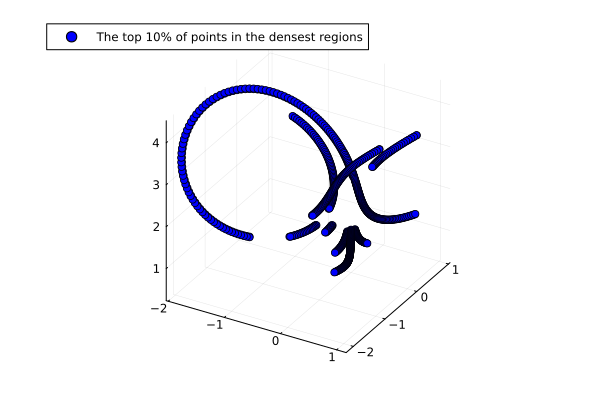

In [113]:
#scatter plot P
scatter3d(x_Pcoords, y_Pcoords, z_Pcoords, label="The top 10% of points in the densest regions", color=:blue)


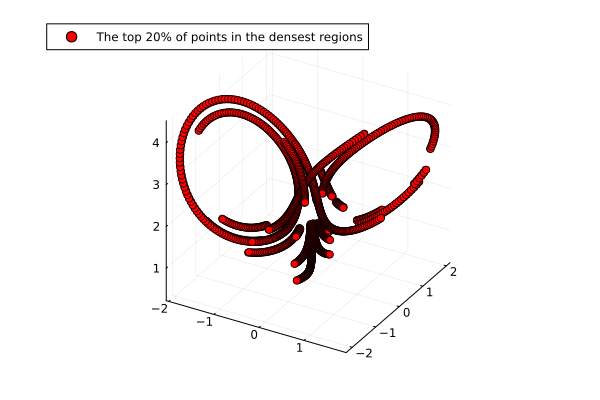

In [115]:
#scatter plot Q
scatter3d(x_Qcoords, y_Qcoords, z_Qcoords, label="The top 20% of points in the densest regions", color=:red)


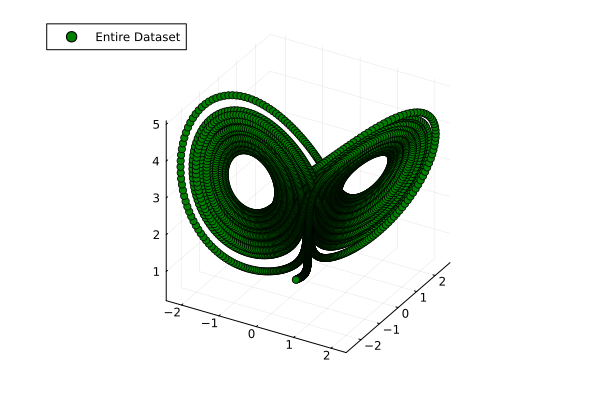

In [117]:
#scatter plot R
scatter3d(x_Rcoords, y_Rcoords, z_Rcoords, label="Entire Dataset", color=:green)


In [119]:
# Plot P and Q together

#scatter3d(x_Pcoords, y_Pcoords, z_Pcoords, label="Set P", color=:blue, markersize=3)
#scatter3d!(x_Qcoords, y_Qcoords, z_Qcoords, label="Set Q", color=:red, markersize=3)


In [186]:
# Compute the distance matrix within P (D_P)
D_P = pairwise(Euclidean(), P', P')
println("Size of D_P: ", size(D_P))
#println("D_P =  ", D_P)



Size of D_P: (1000, 1000)


In [188]:
# Compute the distance matrix within Q (D_Q)
D_Q = pairwise(Euclidean(), Q', Q')
println("Size of D_Q: ", size(D_Q))
#println("D_Q =  ", D_Q)

Size of D_Q: (1999, 1999)


In [ ]:
# Compute the distance matrix between P and Q (Dist(P, Q))
#Dist_PQ = pairwise(Euclidean(), P, Q)

In [ ]:
# Compute Vietoris-Rips persistence on P and Q
dim = 1  # Set the dimension for persistence computation
VR_P = eirene(D_P, record = "all", maxdim = dim)  # Compute Vietoris-Rips persistence for  P
#println("VR_P = ", VR_P)

VR_Q = eirene(D_Q, record = "all", maxdim = dim)  # Compute Vietoris-Rips persistence for  Q
#println("VR_Q = ", VR_Q)
# compute Witness persistence
W_P = compute_Witness_persistence(D_Q, maxdim = dim)  # Compute Witness persistence for the combined data D_P_Q
#println("W_P = ", W_P)

In [ ]:
# Generate the persistence barcode for the variable VR_P with dimension 1
barcode_VR_P = barcode(VR_P, dim = 1)
#println("barcode_VR_P = ", barcode_VR_P)

# Generate the persistence barcode for the output of W_P with dimension 1
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
println("barcode_W_P = ", barcode_W_P)

# Generate the persistence barcode for the variable VR_Q with dimension 1
barcode_VR_Q = barcode(VR_Q, dim = 1);
println("barcode_VR_Q = ", barcode_VR_Q)


In [141]:
# Select persistent intervals for the barcode of VR_P using the IQR method
#selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_VR_P)
#println("selected_P = ", selected_P)
#println("cutoff_P = ", cutoff_P)

if !isempty(barcode_VR_P)
    selected_P, cutoff_P = select_persistent_intervals_IQR(barcode_VR_P)
    println("selected_P = ", selected_P)
    println("cutoff_P = ", cutoff_P)
else
    println("No persistent features found in the barcode.")
end



# Select persistent intervals for the barcode of W_P using the IQR method
#selected_W, cutoff_W = select_persistent_intervals_IQR(barcode_W_P)

# Select persistent intervals for the barcode of VR_Q using the IQR method
#selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)

# Plot the persistence diagram for VR_P with the specified cutoff and title
#p1 = plot_PD(barcode_VR_P, cutoff=cutoff_P, title="PD(P)")

# Plot the persistence diagram for W_P with the specified cutoff and title
#p2 = plot_PD(barcode_W_P, cutoff=cutoff_W, title="WPD")

# Plot the persistence diagram for VR_Q with the specified cutoff and title
#p3 = plot_PD(barcode_VR_Q, cutoff=cutoff_Q, title="PD(Q)")

# Display all three persistence diagrams in a single row layout
#plot(p1, p2, p3, layout=grid(1, 3), size=(800, 300))

No persistent features found in the barcode.


In [105]:
# Run baseline similarity analysis to find analogous pairs
analogous_P, analogous_Q = run_baseline_similarity_analogous(
    VR_P = VR_P,  # Input variable for P
    D_P = D_P,    # Input data for P
    VR_Q = VR_Q,  # Input variable for Q
    D_Q = D_Q,    # Input data for Q
    W_PQ = W_P,   # Weighting for P and Q
    W_PQ_bars = selected_W  # Selected weights for the analysis
)

# Organize output to identify significant analogous cycles
analogous_P_significant, analogous_Q_significant = analogous_cycles_significant(
    analogous_P, 
    analogous_Q, 
    significant_P = selected_P  # Selected significant pairs for P
)

# Print results for each significant analogous pair
for k in keys(analogous_P_significant)
    println("*** Printing analogous pair *** ")
    println("In P: ", analogous_P_significant[k])  # Output for P
    println("In Q: ", analogous_Q_significant[k])  # Output for Q
end 

LoadError: UndefVarError: `selected_W` not defined

In [ ]:
# plot all persistence diagrams & significance feature cutoff

# Create an index of persistence diagrams for P, excluding specific indices
P_idx = [i for i in 1:size(barcode_VR_P,1) if i ∉ [45, 47]]

# Plot the persistence diagram for P with specified parameters
p1 = plot_PD(barcode_VR_P[P_idx,:]; 
            #highlight = [47],  # Uncomment to highlight specific feature
            title = "PD(P)",  # Title of the plot
            cutoff = cutoff_P,  # Significance feature cutoff
            titlefontsize = 16,  # Font size for the title
            tickfontsize = 12,  # Font size for the ticks
            markersize = 9,  # Size of the markers
            pd_min = 0.2,  # Minimum value for the persistence diagram
            pd_max = 2.4)  # Maximum value for the persistence diagram

# Add a scatter plot for the excluded index 47 in deep pink color
scatter!(p1, [barcode_VR_P[47,1]], [barcode_VR_P[47,2]],
            markersize = 9, label = "", 
            c = :deeppink)

# Add a scatter plot for the excluded index 45 in a diamond shape and teal color
scatter!(p1, [barcode_VR_P[45,1]], [barcode_VR_P[45,2]],
            markersize = 9, label = "", 
            markershape = :diamond,
            c = "#3cd7c4")

# Create an index of persistence diagrams for Q, excluding specific indices
Q_idx = [i for i in 1:size(barcode_VR_Q,1) if i ∉ [38, 39, 40]]

# Plot the persistence diagram for Q with specified parameters
p2 = plot_PD(barcode_VR_Q[Q_idx, :]; 
             title = "PD(Q)",  # Title of the plot
            cutoff = cutoff_Q,  # Significance feature cutoff
            markersize = 9,  # Size of the markers
            tickfontsize = 12,  # Font size for the ticks
            titlefontsize = 16,  # Font size for the title
            pd_min = 0.2,  # Minimum value for the persistence diagram
            pd_max = 2.4)  # Maximum value for the persistence diagram

# Add a scatter plot for the excluded indices 38 and 39 in deep pink color
scatter!(p2, [barcode_VR_Q[[38, 39],1]], [barcode_VR_Q[[38, 39],2]],label ="",
            markersize = 9,
            c = :deeppink)

# Add a scatter plot for the excluded index 40 in a diamond shape and teal color
scatter!(p2, [barcode_VR_Q[40,1]], [barcode_VR_Q[40,2]],label ="",
            markersize = 9,
            c = "#3cd7c4",
            markershape = :diamond)

# Combine the two persistence diagrams into a single plot with a grid layout
plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/torus_two_samples/analogous_cycles.pdf")  # Uncomment to save the figure

In [ ]:
# Get the cycle representation for the parameter VR_P at index 47
cr_P = get_cyclerep_Eirene(VR_P, 47)

# Get the cycle representations for the parameter VR_Q at indices 38 and 39
cr_Q_38 = get_cyclerep_Eirene(VR_Q, 38)
cr_Q_39 = get_cyclerep_Eirene(VR_Q, 39)

# Combine the cycle representations from indices 38 and 39 into a single list
cr_Q_combined = [cr_Q_38; cr_Q_39]

# Sort each item in the combined cycle representation list
v = [sort(item) for item in cr_Q_combined]

# Count the occurrences of each unique cycle representation
count = counter(v)

# Filter the cycles that occur exactly once
cr_Q = [k for (k,v) in count if v == 1]

# Plot the cycle representation for cr_P on a square torus with specified parameters
p1 = plot_cycle_single_square_torus(P_2d, cycle = cr_P, title = ""; 
                                    legend = false,
                                    markersize = 5,
                                    c = "#008181")

# Plot the cycle representation for cr_Q on a square torus with specified parameters
p2 = plot_cycle_single_square_torus(Q_2d, cycle = cr_Q, title = ""; 
                                    markersize = 6, 
                                    marker = :xcross,
                                    markerstrokewidth = 4,
                                    c = "#ff8d00",
                                    legend = false)

# Combine the two plots into a single layout with specified size
plot(p1, p2, layout = grid(1,2), size = (600, 300))

# Uncomment the following line to save the plot as a PDF file
#savefig("data/torus_two_samples/analogous_cycle_rep.pdf")

In [ ]:
# Get the cycle representation for the first variable (VR_P) with a specific parameter (45)
cr_P = get_cyclerep_Eirene(VR_P, 45)

# Get the cycle representation for the second variable (VR_Q) with a specific parameter (40)
cr_Q = get_cyclerep_Eirene(VR_Q, 40)

# Plot the cycle representation for the first dataset (P_2d) on a square torus
p1 = plot_cycle_single_square_torus(P_2d, cycle = cr_P, title = ""; 
                                    legend = false,  # Disable legend for this plot
                                    cycle_color = "#3cd7c4",  # Set the color of the cycle
                                    markersize = 5,  # Set the size of the markers
                                    c = "#008181")  # Set the color of the plot

# Plot the cycle representation for the second dataset (Q_2d) on a square torus
p2 = plot_cycle_single_square_torus(Q_2d, cycle = cr_Q, title = ""; 
                                    markersize = 6,  # Set the size of the markers
                                    marker = :xcross,  # Use cross markers for this plot
                                    cycle_color = "#3cd7c4",  # Set the color of the cycle
                                    markerstrokewidth = 4,  # Set the stroke width of the markers
                                    c = "#ff8d00",  # Set the color of the plot
                                    legend = false)  # Disable legend for this plot

# Combine the two plots (p1 and p2) into a single layout with 1 row and 2 columns
plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/torus_two_samples/analogous_cycle_rep_2.pdf")  # Save the combined plot as a PDF (commented out)